In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [12]:
# PE_placebo_t_test.xlsx contains placebo, PE_placebo_t_test_1b.xlsx is aspirin
dfs = []
for trimester in [1, 2, 3]:
    df = pd.read_excel('../data/PE_placebo_t_test_1b.xlsx', sheet_name=f'{trimester}_trimester')
    df = df[['delta-z (mean(PE) - mean(NO_PE))', 'CHEMICAL_NAME', 'class']]  # 
    df.dropna(inplace=True)
    df.rename(columns={'delta-z (mean(PE) - mean(NO_PE))': f'{trimester}_tr'}, inplace=True)
    df.rename(columns={'CHEMICAL_NAME': ''}, inplace=True)
    df.set_index('', inplace=True)
#     df.rename(index={'CHEMICAL_NAME': ''}, inplace=True)
    
    df.loc[:, 'class'] = df.loc[:, 'class'].apply(lambda x: x.rstrip().replace('\xa0', ''))
    dfs.append(df)
all_df = dfs[0].merge(dfs[1], left_index=True,right_index=True, how='outer').merge(dfs[2], left_index=True,right_index=True, how='outer')
all_df

,1_tr,class_x,2_tr,class_y,3_tr,class
,,,,,,
(14 or 15)-methylpalmitate (a17:0 or i17:0),NaN,NaN,0.496546,Fatty Acyls,NaN,NaN
"1,2-dilinoleoyl-GPC (18:2/18:2)",0.600966,Glycerophospholipids,NaN,NaN,NaN,NaN
"1,2-dilinoleoyl-GPE (18:2/18:2)*",0.621869,Glycerophospholipids,NaN,NaN,NaN,NaN
1-(1-enyl-palmitoyl)-2-arachidonoyl-GPC (P-16:0/20:4)*,NaN,NaN,-0.574378,Glycerophospholipids,NaN,NaN
1-(1-enyl-palmitoyl)-2-linoleoyl-GPC (P-16:0/18:2)*,-0.556686,Glycerophospholipids,-0.790104,Glycerophospholipids,NaN,NaN
...,...,...,...,...,...,...
tiglylcarnitine (C5:1-DC),NaN,NaN,NaN,NaN,0.993775,Fatty Acyls
tyramine O-sulfate,NaN,NaN,NaN,NaN,0.900720,Organic sulfuric acids and derivatives
urate,NaN,NaN,NaN,NaN,1.373648,Imidazopyrimidines


In [13]:
all_df.loc[:, 'class'] = all_df.loc[:, ['class', 'class_x']].apply(lambda x: x[0] if x[0]==x[0] else x[1],axis=1)
all_df.loc[:, 'class'] = all_df.loc[:, ['class', 'class_y']].apply(lambda x: x[0] if x[0]==x[0] else x[1],axis=1)
all_df = all_df[['1_tr', '2_tr', '3_tr', 'class']]
all_df = all_df.fillna(0)
all_df.sort_values(by='class', inplace=True)
all_df

,1_tr,2_tr,3_tr,class
,,,,
phenyllactate (PLA),0.000000,0.000000,0.370041,Benzene and substituted derivatives
N-acetylputrescine,0.000000,0.000000,0.688987,Carboximidic acids and derivatives
gamma-glutamylglutamate,0.000000,0.572508,0.889266,Carboxylic acids and derivatives
serine,0.000000,-0.612105,0.000000,Carboxylic acids and derivatives
cystine,-0.493138,-0.678391,0.536940,Carboxylic acids and derivatives
...,...,...,...,...
cholesterol,0.000000,-0.472453,0.000000,Steroids and steroid derivatives
cortisol,0.000000,-0.737660,-0.589424,Steroids and steroid derivatives
"5alpha-androstan-3beta,17beta-diol disulfate",0.000000,0.714991,1.036802,Steroids and steroid derivatives


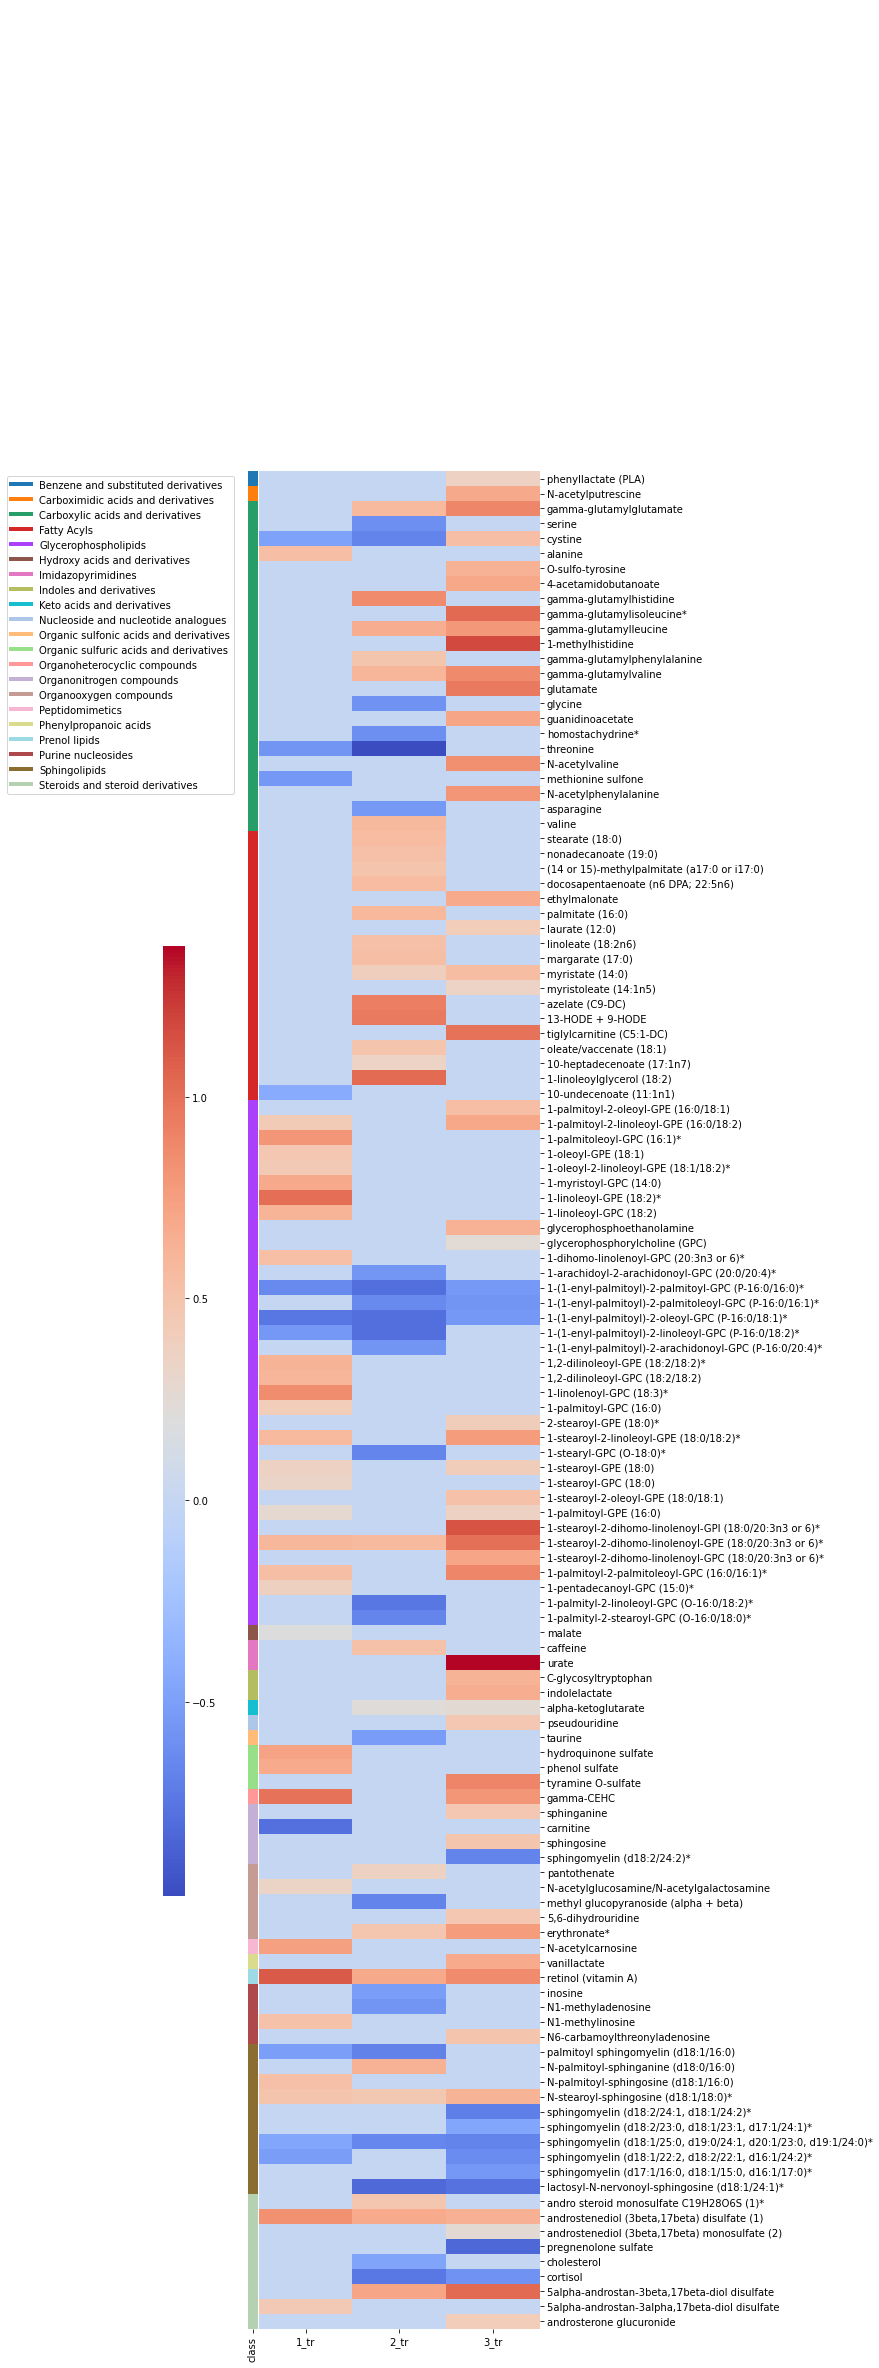

In [14]:
cluster_palette = ["#1f77b4", "#ff7f0e", "#279e68", "#d62728", "#aa40fc", "#8c564b", \
                  "#e377c2", "#b5bd61", "#17becf", "#aec7e8", "#ffbb78", "#98df8a", "#ff9896", \
                  "#c5b0d5", "#c49c94", "#f7b6d2", "#dbdb8d", "#9edae5", "#ad494a", "#8c6d31", "#b4d2b1", "#568f8b", "#1d4a60", "#cd7e59", "#ddb247"]
lut = dict(zip(all_df['class'].unique(), cluster_palette))
row_colors = all_df['class'].map(lut)

g = sns.clustermap(all_df[['1_tr', '2_tr', '3_tr']], 
               row_cluster=False, col_cluster=False, row_colors=row_colors, 
               cmap = sns.color_palette("coolwarm", as_cmap=True), figsize=(10, 33))
g.ax_cbar.set_position((0., .2, .03, .4))


itms = list(lut.items())
labels = [x[0] for x in itms]
colors = [x[1] for x in itms]

# Add legend for classes
custom_lines = []
for col in colors:
    custom_lines.append(Line2D([0], [0], color=col, lw=4))
plt.legend(custom_lines, labels, bbox_to_anchor=(3.5,1.5))


plt.savefig('fig1b_heatmap.png', dpi=300, bbox_inches='tight')

# Metabolite affected by PE in placebo and aspirin group

In [4]:
study_dict = dict()
for study, fname in zip(['placebo', 'aspirin'], ['../data/PE_placebo_t_test.xlsx', '../data/PE_placebo_t_test_1b.xlsx']):
    print(study)
    study_dict[study] = dict()
    for trimester in [1, 2, 3]:
        df = pd.read_excel(fname, sheet_name=f'{trimester}_trimester')
        study_dict[study][trimester] = set(df['CHEMICAL_NAME'].values)
study_dict

placebo
aspirin


{'placebo': {1: {'3-phenylpropionate (hydrocinnamate)',
   '4-cholesten-3-one',
   'N-delta-acetylornithine',
   'S-methylcysteine sulfoxide',
   'androstenediol (3alpha, 17alpha) monosulfate (2)',
   'benzoate',
   'caproate (6:0)',
   'carnitine',
   'creatinine',
   'deoxycarnitine',
   'glycine',
   'glycosyl-N-behenoyl-sphingadienine (d18:2/22:0)*',
   'iminodiacetate (IDA)',
   'indoleacetate',
   'isobutyrylcarnitine (C4)',
   'methionine sulfone',
   nan,
   'sarcosine',
   "trigonelline (N'-methylnicotinate)"},
  2: {'1-(1-enyl-palmitoyl)-2-arachidonoyl-GPC (P-16:0/20:4)*',
   '1-linoleoyl-GPI (18:2)*',
   '1-myristoyl-2-palmitoyl-GPC (14:0/16:0)',
   '2-hydroxyoctanoate',
   '2-hydroxystearate',
   '3-phosphoglycerate',
   '4-vinylphenol sulfate',
   '5-oxoproline',
   'N-acetylglycine',
   "adenosine 5'-monophosphate (AMP)",
   'arginine',
   'beta-cryptoxanthin',
   'carnitine',
   'cys-gly, oxidized',
   'gluconate',
   'glycosyl ceramide (d18:2/24:1, d18:1/24:2)*',
   'hy

In [10]:
diff_dict = dict()
intersect_dict = dict()
for trimester in [1, 2, 3]:
    diff_dict[trimester] = study_dict['aspirin'][trimester].difference(study_dict['placebo'][trimester])
    print(len(diff_dict[trimester]))
    intersect_dict[trimester] = study_dict['aspirin'][trimester].intersection(study_dict['placebo'][trimester])
    print(len(intersect_dict[trimester]))
    print('--------')
# diff_dict

47
2
--------
59
3
--------
60
9
--------


In [25]:
diff_dict

{1: {'1,2-dilinoleoyl-GPC (18:2/18:2)',
  '1,2-dilinoleoyl-GPE (18:2/18:2)*',
  '1-(1-enyl-palmitoyl)-2-linoleoyl-GPC (P-16:0/18:2)*',
  '1-(1-enyl-palmitoyl)-2-oleoyl-GPC (P-16:0/18:1)*',
  '1-(1-enyl-palmitoyl)-2-palmitoyl-GPC (P-16:0/16:0)*',
  '1-dihomo-linolenoyl-GPC (20:3n3 or 6)*',
  '1-linolenoyl-GPC (18:3)*',
  '1-linoleoyl-GPC (18:2)',
  '1-linoleoyl-GPE (18:2)*',
  '1-myristoyl-GPC (14:0)',
  '1-oleoyl-2-linoleoyl-GPE (18:1/18:2)*',
  '1-oleoyl-GPE (18:1)',
  '1-palmitoleoyl-GPC (16:1)*',
  '1-palmitoyl-2-linoleoyl-GPE (16:0/18:2)',
  '1-palmitoyl-2-palmitoleoyl-GPC (16:0/16:1)*',
  '1-palmitoyl-GPC (16:0)',
  '1-palmitoyl-GPE (16:0)',
  '1-pentadecanoyl-GPC (15:0)*',
  '1-stearoyl-2-dihomo-linolenoyl-GPE (18:0/20:3n3 or 6)*',
  '1-stearoyl-2-dihomo-linolenoyl-GPI (18:0/20:3n3 or 6)*',
  '1-stearoyl-2-linoleoyl-GPE (18:0/18:2)*',
  '1-stearoyl-GPC (18:0)',
  '1-stearoyl-GPE (18:0)',
  '1-stearyl-2-arachidonoyl-GPC (O-18:0/20:4)*',
  '10-undecenoate (11:1n1)',
  '5alpha-andro

# Aspirin vs placebo

In [16]:
met_names_df = pd.read_excel('../data/BAYL-04-22MD+ Data Tables Updated.xlsx', sheet_name='Chemical Annotation')
met_names_df = met_names_df.loc[:, ['CHEMICAL_NAME', 'SUB_PATHWAY']]
met_names_dict = {x[0]: x[1] for x in met_names_df.values}
met_names_df.set_index('CHEMICAL_NAME', inplace=True)
met_names_df.head()

,SUB_PATHWAY
CHEMICAL_NAME,
S-1-pyrroline-5-carboxylate,Glutamate Metabolism
spermidine,Polyamine Metabolism
1-methylnicotinamide,Nicotinate and Nicotinamide Metabolism
"12,13-DiHOME","Fatty Acid, Dihydroxy"
5-hydroxyindoleacetate,Tryptophan Metabolism


In [47]:
# PE_placebo_t_test.xlsx contains placebo, PE_placebo_t_test_1b.xlsx is aspirin
dfs = []
for trimester in [1, 2, 3]:
    df = pd.read_excel('../data/ttests_aspirin_vs_placebo.xlsx', sheet_name=f'{trimester}_trimester')
#     df.loc[:, 'class'] = df['Metabolite'].apply(lambda x: met_names_dict[x])
    df = df[['delta-z (mean(PE) - mean(NO_PE))', 'Metabolite', 'class']]  # 
    df.dropna(inplace=True)
    df.rename(columns={'delta-z (mean(PE) - mean(NO_PE))': f'{trimester}_tr'}, inplace=True)
    df.rename(columns={'Metabolite': ''}, inplace=True)
    df.set_index('', inplace=True)
#     df.rename(index={'CHEMICAL_NAME': ''}, inplace=True)
    
    df.loc[:, 'class'] = df.loc[:, 'class'].apply(lambda x: x.rstrip().replace('\xa0', ''))
    dfs.append(df)
all_df = dfs[0].merge(dfs[1], left_index=True,right_index=True, how='outer').merge(dfs[2], left_index=True,right_index=True, how='outer')

all_df.loc[:, 'class'] = all_df.loc[:, ['class', 'class_x']].apply(lambda x: x[0] if x[0]==x[0] else x[1],axis=1)
all_df.loc[:, 'class'] = all_df.loc[:, ['class', 'class_y']].apply(lambda x: x[0] if x[0]==x[0] else x[1],axis=1)
all_df = all_df[['1_tr', '2_tr', '3_tr', 'class']]
all_df = all_df.fillna(0)
all_df.sort_values(by='class', inplace=True)
all_df

,1_tr,2_tr,3_tr,class
,,,,
glutamate,0.000000,0.000000,0.738526,Carboxylic acids and derivatives
aspartate,0.000000,-0.560306,0.000000,Carboxylic acids and derivatives
beta-citrylglutamate,0.000000,0.000000,0.914794,Citric Acid Cycle Intermediates and Derivatives
1-(1-enyl-oleoyl)-GPE (P-18:1)*,0.000000,0.000000,0.854660,Glycerophosphoethanolamines
1-linoleoyl-GPC (18:2),0.000000,0.000000,-0.471074,Glycerophospholipids
1-(1-enyl-palmitoyl)-GPC (P-16:0)*,0.366441,0.000000,-0.304923,Glycerophospholipids
glycerol 3-phosphate,0.000000,0.000000,-0.632168,Glycerophospholipids
glycerophosphoethanolamine,0.000000,0.000000,0.412275,Glycerophospholipids
1-(1-enyl-stearoyl)-GPE (P-18:0)*,0.000000,0.000000,0.776714,Glycerophospholipids


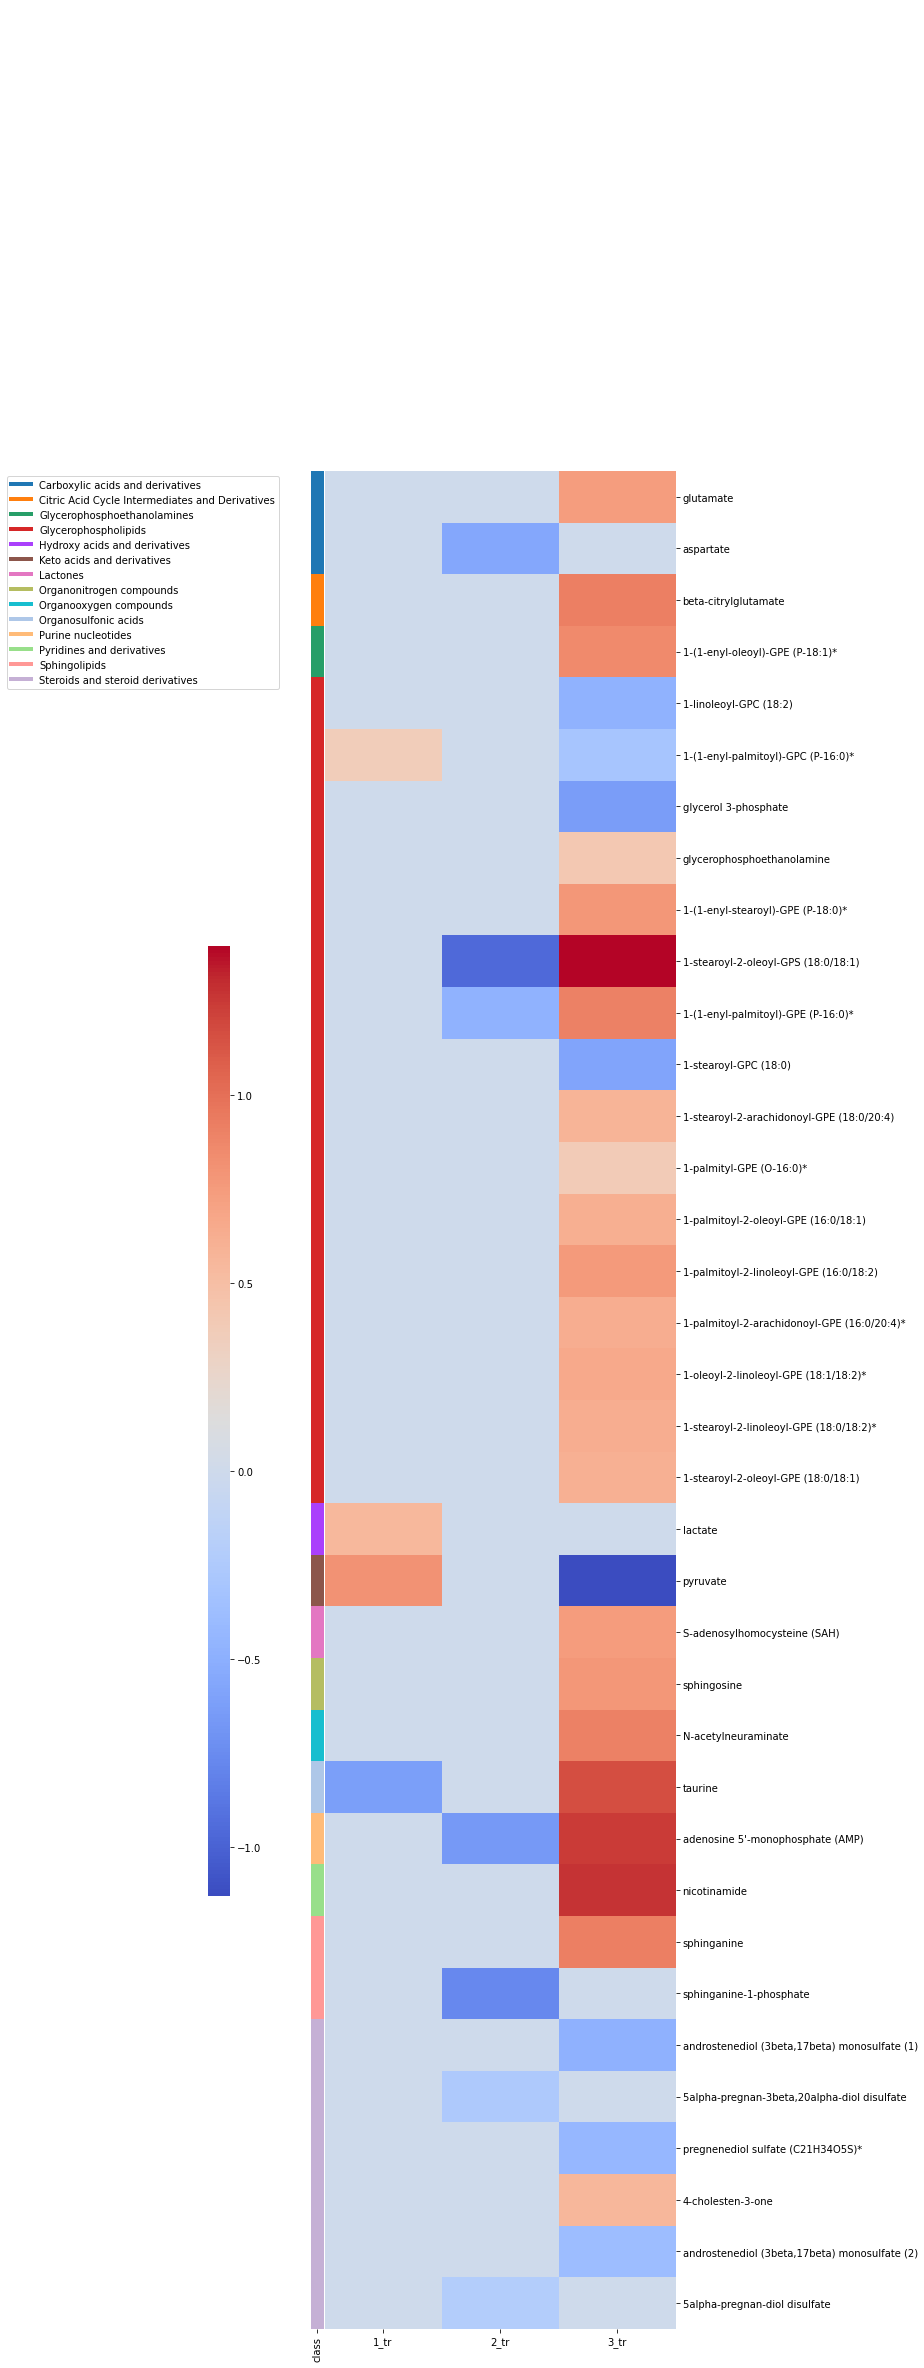

In [48]:
cluster_palette = ["#1f77b4", "#ff7f0e", "#279e68", "#d62728", "#aa40fc", "#8c564b", \
                  "#e377c2", "#b5bd61", "#17becf", "#aec7e8", "#ffbb78", "#98df8a", "#ff9896", \
                  "#c5b0d5", "#c49c94", "#f7b6d2", "#dbdb8d", "#9edae5", "#ad494a", "#8c6d31", "#b4d2b1", "#568f8b", "#1d4a60", "#cd7e59", "#ddb247"]
lut = dict(zip(all_df['class'].unique(), cluster_palette))
row_colors = all_df['class'].map(lut)

g = sns.clustermap(all_df[['1_tr', '2_tr', '3_tr']], 
               row_cluster=False, col_cluster=False, row_colors=row_colors, 
               cmap = sns.color_palette("coolwarm", as_cmap=True), figsize=(10, 33))
g.ax_cbar.set_position((0., .2, .03, .4))


itms = list(lut.items())
labels = [x[0] for x in itms]
colors = [x[1] for x in itms]

# Add legend for classes
custom_lines = []
for col in colors:
    custom_lines.append(Line2D([0], [0], color=col, lw=4))
plt.legend(custom_lines, labels, bbox_to_anchor=(3.5,1.5))


plt.savefig('fig_aspirin_placebo_heatmap.png', dpi=300, bbox_inches='tight')

# Aspirin vs placebo - affect PE

In [49]:
# PE_placebo_t_test.xlsx contains placebo, PE_placebo_t_test_1b.xlsx is aspirin
dfs = []
for trimester in [1, 2, 3]:
    df = pd.read_excel('../data/ttests_aspirin_vs_placebo.xlsx', sheet_name=f'{trimester}_trimester')
#     df.loc[:, 'class'] = df['Metabolite'].apply(lambda x: met_names_dict[x])
    df = df[['delta-z (mean(PE) - mean(NO_PE))', 'Metabolite', 'class']]  # 
    df.dropna(inplace=True)
    df.rename(columns={'delta-z (mean(PE) - mean(NO_PE))': f'{trimester}_tr'}, inplace=True)
    df.rename(columns={'Metabolite': ''}, inplace=True)
    df.set_index('', inplace=True)
    
    df.loc[:, 'class'] = df.loc[:, 'class'].apply(lambda x: x.rstrip().replace('\xa0', ''))
    
    df = df[df.index.isin(diff_dict[trimester])] # Only consider ones significant for PE between aspirin and placebo group
    dfs.append(df)
all_df = dfs[0].merge(dfs[1], left_index=True,right_index=True, how='outer').merge(dfs[2], left_index=True,right_index=True, how='outer')

all_df.loc[:, 'class'] = all_df.loc[:, ['class', 'class_x']].apply(lambda x: x[0] if x[0]==x[0] else x[1],axis=1)
all_df.loc[:, 'class'] = all_df.loc[:, ['class', 'class_y']].apply(lambda x: x[0] if x[0]==x[0] else x[1],axis=1)
all_df = all_df[['1_tr', '2_tr', '3_tr', 'class']]
all_df = all_df.fillna(0)
all_df.sort_values(by='class', inplace=True)
all_df

,1_tr,2_tr,3_tr,class
,,,,
glutamate,0.0,0.0,0.738526,Carboxylic acids and derivatives
glycerophosphoethanolamine,0.0,0.0,0.412275,Glycerophospholipids
1-palmitoyl-2-linoleoyl-GPE (16:0/18:2),0.0,0.0,0.761464,Glycerophospholipids
1-palmitoyl-2-oleoyl-GPE (16:0/18:1),0.0,0.0,0.626532,Glycerophospholipids
1-stearoyl-2-oleoyl-GPE (18:0/18:1),0.0,0.0,0.614972,Glycerophospholipids
1-stearoyl-2-linoleoyl-GPE (18:0/18:2)*,0.0,0.0,0.633790,Glycerophospholipids
sphingosine,0.0,0.0,0.776297,Organonitrogen compounds
sphinganine,0.0,0.0,0.916853,Sphingolipids
"androstenediol (3beta,17beta) monosulfate (2)",0.0,0.0,-0.382696,Steroids and steroid derivatives


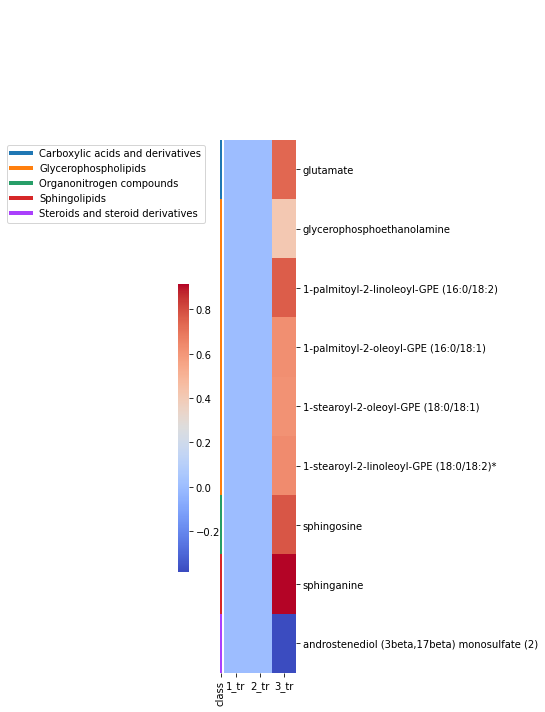

In [50]:
cluster_palette = ["#1f77b4", "#ff7f0e", "#279e68", "#d62728", "#aa40fc", "#8c564b", \
                  "#e377c2", "#b5bd61", "#17becf", "#aec7e8", "#ffbb78", "#98df8a", "#ff9896", \
                  "#c5b0d5", "#c49c94", "#f7b6d2", "#dbdb8d", "#9edae5", "#ad494a", "#8c6d31", "#b4d2b1", "#568f8b", "#1d4a60", "#cd7e59", "#ddb247"]
lut = dict(zip(all_df['class'].unique(), cluster_palette))
row_colors = all_df['class'].map(lut)

g = sns.clustermap(all_df[['1_tr', '2_tr', '3_tr']], 
               row_cluster=False, col_cluster=False, row_colors=row_colors, 
               cmap = sns.color_palette("coolwarm", as_cmap=True), figsize=(5, 10))
g.ax_cbar.set_position((-0.03, .2, .03, .4))


itms = list(lut.items())
labels = [x[0] for x in itms]
colors = [x[1] for x in itms]

# Add legend for classes
custom_lines = []
for col in colors:
    custom_lines.append(Line2D([0], [0], color=col, lw=4))
plt.legend(custom_lines, labels, bbox_to_anchor=(3.,1.5))


plt.savefig('fig_aspirin_placebo_PE_heatmap.png', dpi=300, bbox_inches='tight')